In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
file_name='insurance.csv'
df=pd.read_csv(file_name)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.value_counts("sex")

sex
male      675
female    662
Name: count, dtype: int64

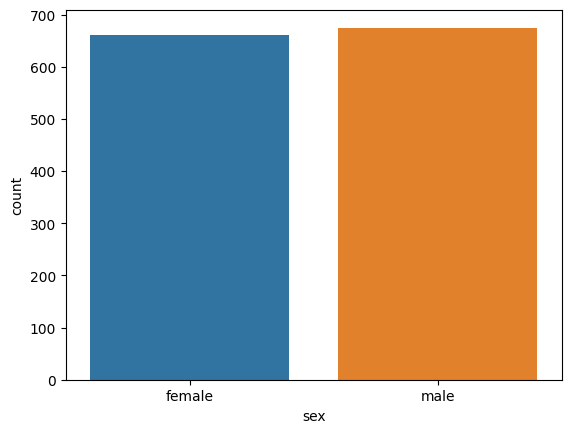

In [11]:
sns.countplot(x= "sex", data = df)
plt.show()

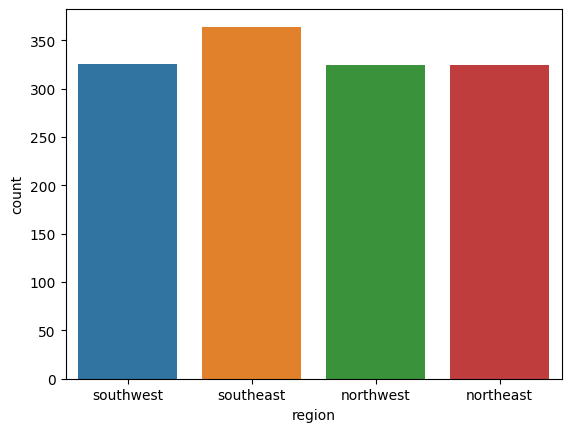

In [12]:
sns.countplot(x= "region", data = df)
plt.show()

<Axes: xlabel='region', ylabel='charges'>

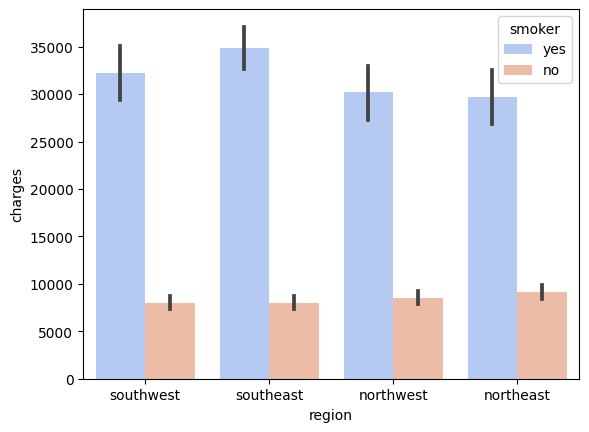

In [4]:
sns.barplot(x='region' , y='charges', data=df, hue='smoker' , palette='coolwarm')

In [13]:
from sklearn import preprocessing

In [14]:
labelencoder=preprocessing.LabelEncoder()

In [15]:
df['smoker']=labelencoder.fit_transform(df['smoker'])
df['sex']=labelencoder.fit_transform(df['sex'])
df['region']=labelencoder.fit_transform(df['region'])

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [17]:
df.corr()['charges']

age         0.298308
sex         0.058044
bmi         0.198401
children    0.067389
smoker      0.787234
region     -0.006547
charges     1.000000
Name: charges, dtype: float64

smoker and age are more related to charges 

<Axes: >

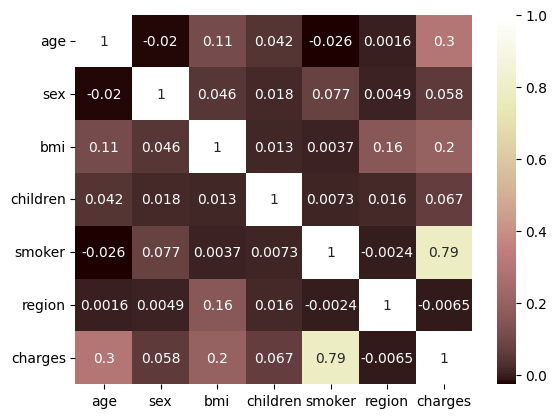

In [18]:
sns.heatmap(df.corr(),annot=True, cmap='pink')

In [21]:
x=df[['age','sex','bmi','children','smoker','region']]
y=df['charges']

<h3>Machine Learning</h3>

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
x_train , x_test , y_train , y_test=train_test_split(x,y, test_size=0.30)

In [25]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)


In [26]:
from sklearn.metrics import mean_squared_error , mean_absolute_error
def modelresults(predictions):
    print("MSE :{}".format(mean_absolute_error(y_test,predictions)))
    print("Root MSE :{}".format(np.sqrt(mean_squared_error(y_test,predictions))))

In [27]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(scaled_x_train,y_train)

LinearRegression()

In [28]:
predslr=lr.predict(scaled_x_test)#linear regression 
modelresults(predslr)

MSE :4183.999969430467
Root MSE :6105.160987859779


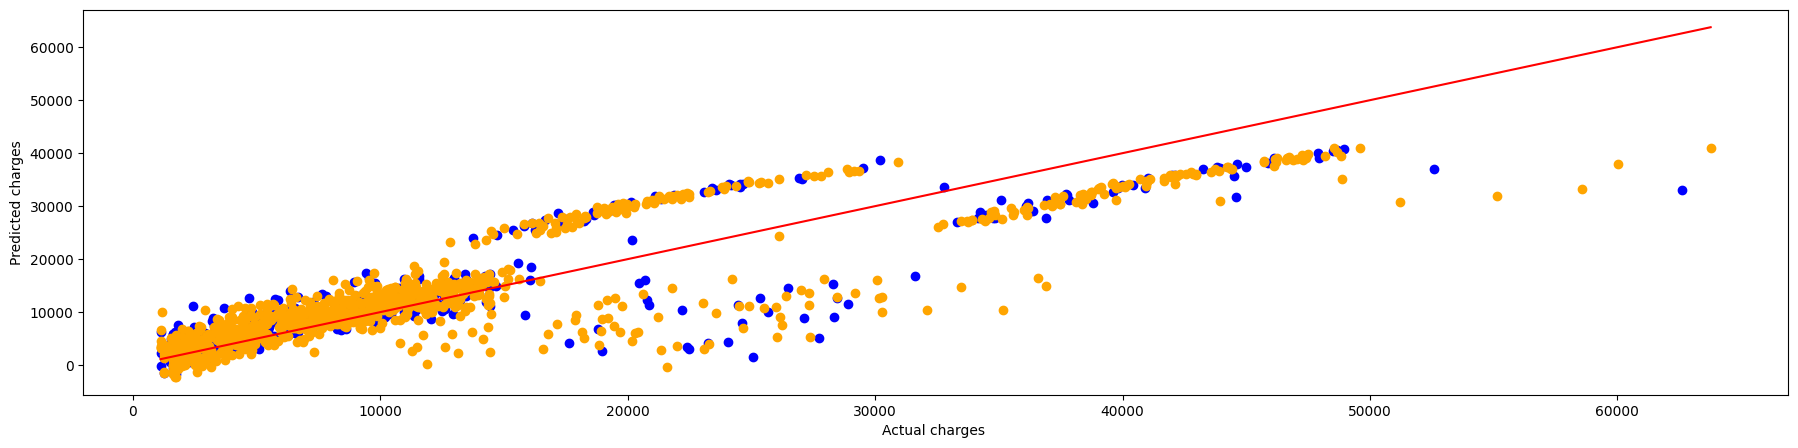

In [45]:
y_train_predict = lr.predict(scaled_x_train)
y_test_predict =lr.predict(scaled_x_test)

plt.figure(figsize=(22,5))
plt.scatter(y_test, y_test_predict,  color='blue')
plt.scatter(y_train, y_train_predict,  color='Orange')
plt.plot([df['charges'].min(), df['charges'].max()], [df['charges'].min(), df['charges'].max()], color='red')
plt.xlabel('Actual charges ')
plt.ylabel('Predicted charges')
plt.show() 

In [46]:
compare={"Actual": y_test, "Predict": y_test_predict}
pd.DataFrame(compare)

,Actual,Predict
527,9861.02500,9148.616837
806,28476.73499,12665.414793
1253,15828.82173,9468.909139
1251,1241.56500,-1426.070929
508,3044.21330,2893.492055
...,...,...
592,2566.47070,4330.809821
1101,11253.42100,11710.307994
549,45863.20500,38096.595325
356,8944.11510,15719.589868


In [30]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svrmodel=SVR()
param_gridsvr={'C':[0.001,0.01,0.01,0,0.1,0.5,1],'kernel':['linear','rbf','poly'],'gamma':['scale','auto'],'degree':[2,3,4,5]}
gridsvr=GridSearchCV(svrmodel,param_gridsvr)
gridsvr.fit(scaled_x_train,y_train)

Best paramters for model is : {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [31]:
predegridsvr=gridsvr.predict(scaled_x_test)#Support Vector regression 
modelresults(predegridsvr)

MSE :7827.1546007990955
Root MSE :12074.564632351969


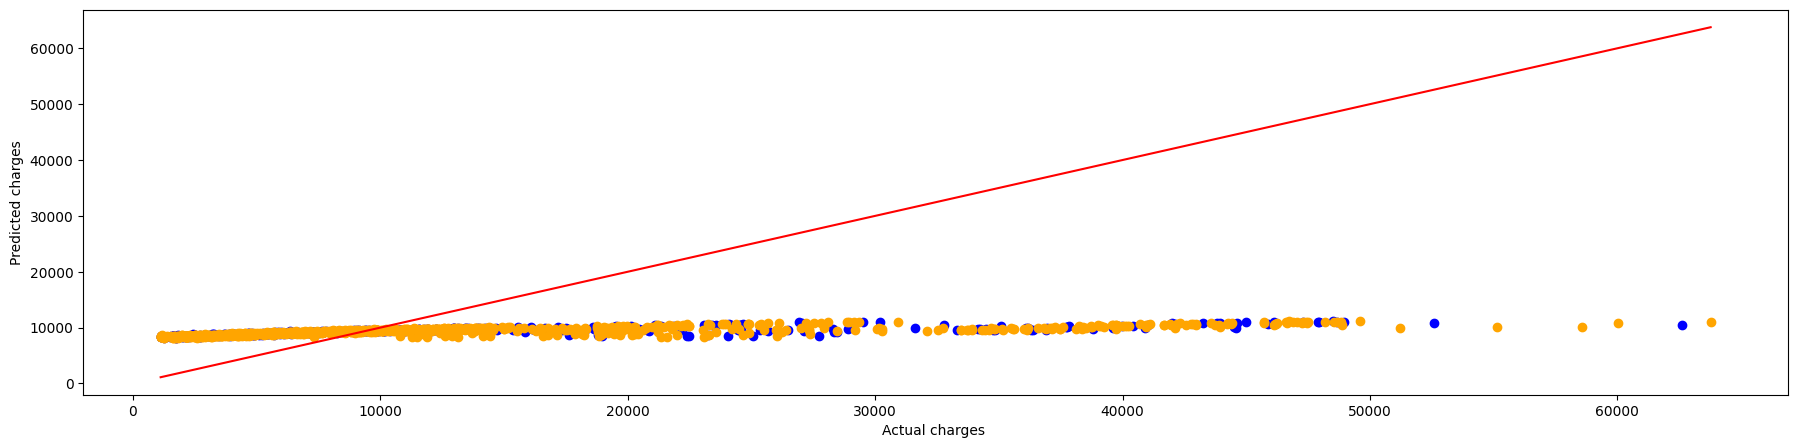

In [43]:
y_train_predict = gridsvr.predict(scaled_x_train)
y_test_predict =gridsvr.predict(scaled_x_test)

plt.figure(figsize=(22,5))
plt.scatter(y_test, y_test_predict,  color='blue')
plt.scatter(y_train, y_train_predict,  color='Orange')
plt.plot([df['charges'].min(), df['charges'].max()], [df['charges'].min(), df['charges'].max()], color='red')
plt.xlabel('Actual charges ')
plt.ylabel('Predicted charges')
plt.show() 

In [44]:
compare={"Actual": y_test, "Predict": y_test_predict}
pd.DataFrame(compare)

,Actual,Predict
527,9861.02500,9342.172773
806,28476.73499,9281.198761
1253,15828.82173,9134.788151
1251,1241.56500,8184.601320
508,3044.21330,8519.798011
...,...,...
592,2566.47070,8484.832438
1101,11253.42100,9524.132406
549,45863.20500,10572.282036
356,8944.11510,9555.546171


In [34]:
from sklearn.ensemble import RandomForestRegressor
rfmodel=RandomForestRegressor()
param_gridrfr={'bootstrap':[True],'max_depth':[5,10,15],'max_features':['log2','auto'],'n_estimators':[2,3,4,5,6,7,8,9,10]}
gridrfr=GridSearchCV(rfmodel,param_gridrfr)
gridrfr.fit(scaled_x_train,y_train)


C:\Users\samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packag

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15],
                         'max_features': ['log2', 'auto'],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [35]:
predegridfr=gridrfr.predict(scaled_x_test)#random forest regression 
modelresults(predegridfr)

MSE :2430.6895216032094
Root MSE :4581.316127078133


In [37]:
c=1
for index in x.columns:
    mean=df[index].mean()
    print("the mean : {} is {}".format(c,mean))
    c+=1


the mean : 1 is 39.222139117427076
the mean : 2 is 0.5048616305160808
the mean : 3 is 30.66345175766642
the mean : 4 is 1.0957367240089753
the mean : 5 is 0.2049364248317128
the mean : 6 is 1.5160807778608825


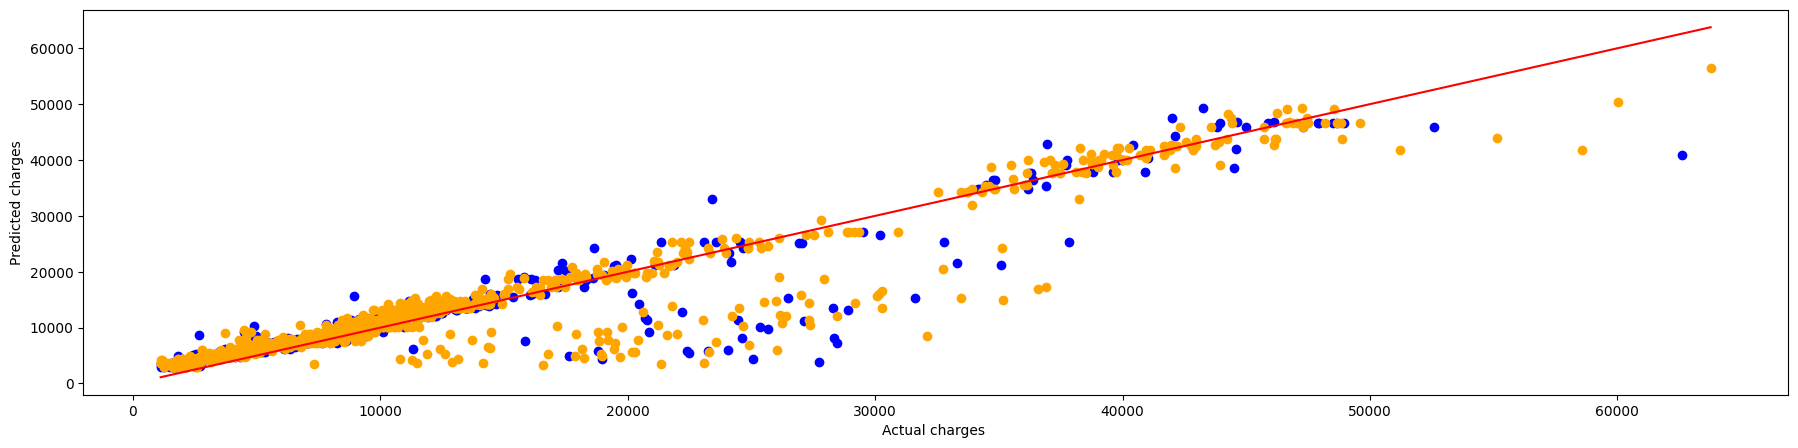

In [47]:

y_train_predict = gridrfr.predict(scaled_x_train)
y_test_predict =gridrfr.predict(scaled_x_test)

plt.figure(figsize=(22,5))
plt.scatter(y_test, y_test_predict,  color='blue')
plt.scatter(y_train, y_train_predict,  color='Orange')
plt.plot([df['charges'].min(), df['charges'].max()], [df['charges'].min(), df['charges'].max()], color='red')
plt.xlabel('Actual charges ')
plt.ylabel('Predicted charges')
plt.show() 

In [48]:
compare={"Actual": y_test, "Predict": y_test_predict}
pd.DataFrame(compare)

,Actual,Predict
527,9861.02500,12337.834328
806,28476.73499,7278.883896
1253,15828.82173,7691.384139
1251,1241.56500,2873.239861
508,3044.21330,4401.054326
...,...,...
592,2566.47070,5265.251744
1101,11253.42100,13383.599863
549,45863.20500,46667.781683
356,8944.11510,9223.868724


In [38]:
newcustomer=np.array([39,0,30,1,0,1])
print("the insurance cost of new customer is {}".format(gridrfr.predict(newcustomer.reshape(1,-1))))

the insurance cost of new customer is [18769.72589644]
